In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [234]:
tickets = pd.read_csv('tickets.csv')
print(tickets.shape)
#print("Basic Information:")
#print(tickets.info())
print("\nMissing Values:")
#print(tickets.isnull().sum())
print(tickets.isna().sum())
tickets.describe(include='object')

(1167285, 12)

Missing Values:
ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
ROUNDTRIP               0
REPORTING_CARRIER       0
PASSENGERS           1977
ITIN_FARE             960
DESTINATION             0
dtype: int64


,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,REPORTING_CARRIER,ITIN_FARE,DESTINATION
count,1167285,1167285,1167285,1167285,1167285,1166325,1167285
unique,419,1,52,52,21,3791,410
top,LAX,US,CA,California,AA,11.0,LAX
freq,33462,1167285,129910,129910,185117,32926,38947


In [235]:
flights = pd.read_csv('Flights.csv')
print(flights.shape)
print(flights.describe(include='object'))
print("\nMissing Values:")
#print(flights.isnull().sum())
print(flights.isna().sum())
flights.drop(flights[flights['CANCELLED'] == 1.0].index, inplace=True)
flights.drop(flights[flights['AIR_TIME'].isna()].index, inplace=True)
flights.drop(flights[flights['OCCUPANCY_RATE'].isna()].index, inplace=True)
flights.drop(flights[flights['DISTANCE'].isna()].index, inplace=True)
print(flights.isnull().sum())
print(flights.isna().sum())
print(flights.shape)

/var/folders/hl/w24rw40s2ysg4f5hvvkbv3w80000gn/T/ipykernel_91303/1139215367.py:1: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('Flights.csv')


(1915886, 16)
           FL_DATE OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM   ORIGIN  \
count      1915886    1915886  1903730            1915886  1915886   
unique         134         26     6032               9086      361   
top     2019-03-15         WN   N485HA                403      ATL   
freq         23361     330295      928                862    93763   

       ORIGIN_CITY_NAME DESTINATION DEST_CITY_NAME   AIR_TIME   DISTANCE  
count           1915886     1915886        1915886  1859335.0  1915256.0  
unique              355         361            355     1208.0     1956.0  
top         Chicago, IL         ATL    Chicago, IL       56.0      337.0  
freq             111550       93635         112641    16985.0    13490.0  

Missing Values:
FL_DATE                  0
OP_CARRIER               0
TAIL_NUM             12156
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
ORIGIN_CITY_NAME         0
DEST_AIRPORT_ID          0
DESTINATION              0


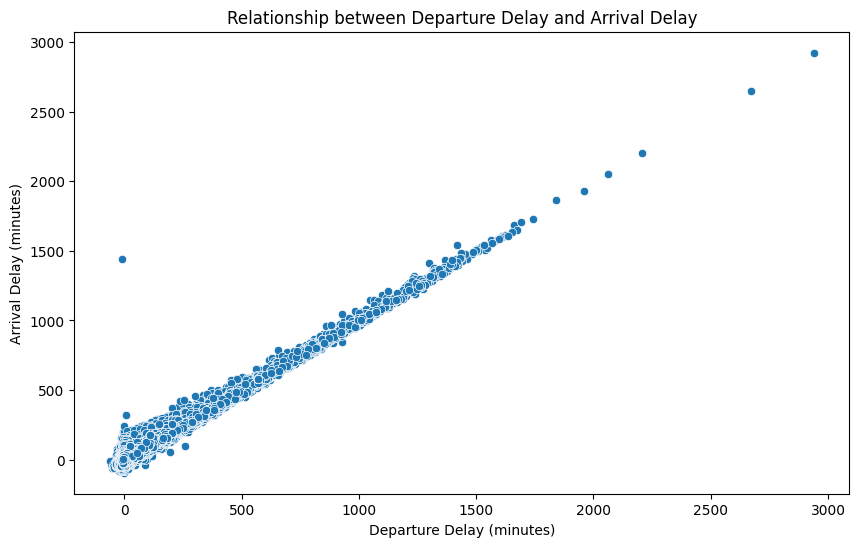

In [236]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=flights)
plt.title('Relationship between Departure Delay and Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

#flights[['DEP_DELAY','ARR_DELAY']]

In [237]:
flights.loc[flights['DEP_DELAY'].isna(), 'DEP_DELAY'] = flights['ARR_DELAY'] # computed because of linear relationship
#print(flights.isnull().sum())
print(flights.isna().sum())
flights.shape

FL_DATE              0
OP_CARRIER           0
TAIL_NUM             0
OP_CARRIER_FL_NUM    0
ORIGIN_AIRPORT_ID    0
ORIGIN               0
ORIGIN_CITY_NAME     0
DEST_AIRPORT_ID      0
DESTINATION          0
DEST_CITY_NAME       0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
AIR_TIME             0
DISTANCE             0
OCCUPANCY_RATE       0
dtype: int64


(1858595, 16)

In [238]:
flights[['FL_YEAR', 'FL_MONTH', 'FL_DAY']] = flights['FL_DATE'].str.split('[-/]', expand=True)
flights.drop(columns=['FL_DATE'], inplace=True)
flights.shape

(1858595, 18)

In [239]:
flights['DISTANCE'] = pd.to_numeric(flights['DISTANCE'], errors='coerce') # Convert DISTANCE to numeric, setting non-numeric values to NaN
flights.dropna(subset=['DISTANCE'], inplace=True) # Drop rows where DISTANCE is NaN
flights['AIR_TIME'] = pd.to_numeric(flights['AIR_TIME'], errors='coerce') # Convert DISTANCE to numeric, setting non-numeric values to NaN
flights.dropna(subset=['AIR_TIME'], inplace=True) 
print(flights.shape)
flights.drop_duplicates(inplace=True)
print(flights.shape)

(1855395, 18)
(1855044, 18)


In [240]:
flights

,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,FL_YEAR,FL_MONTH,FL_DAY
0,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.970000,2019,03,02
1,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.550000,2019,03,02
2,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.910000,2019,03,02
3,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.670000,2019,03,02
4,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.620000,2019,03,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910976,AA,N960AN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",4.0,1.0,0.0,123.0,-198.0,0.666987,3,19,19
1910977,AA,N870NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-7.0,-28.0,0.0,121.0,-198.0,0.521943,3,20,19
1910978,AA,N841NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-4.0,-19.0,0.0,112.0,-198.0,0.801774,3,21,19
1910979,AA,N886NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-7.0,-33.0,0.0,117.0,-198.0,0.848048,3,22,19


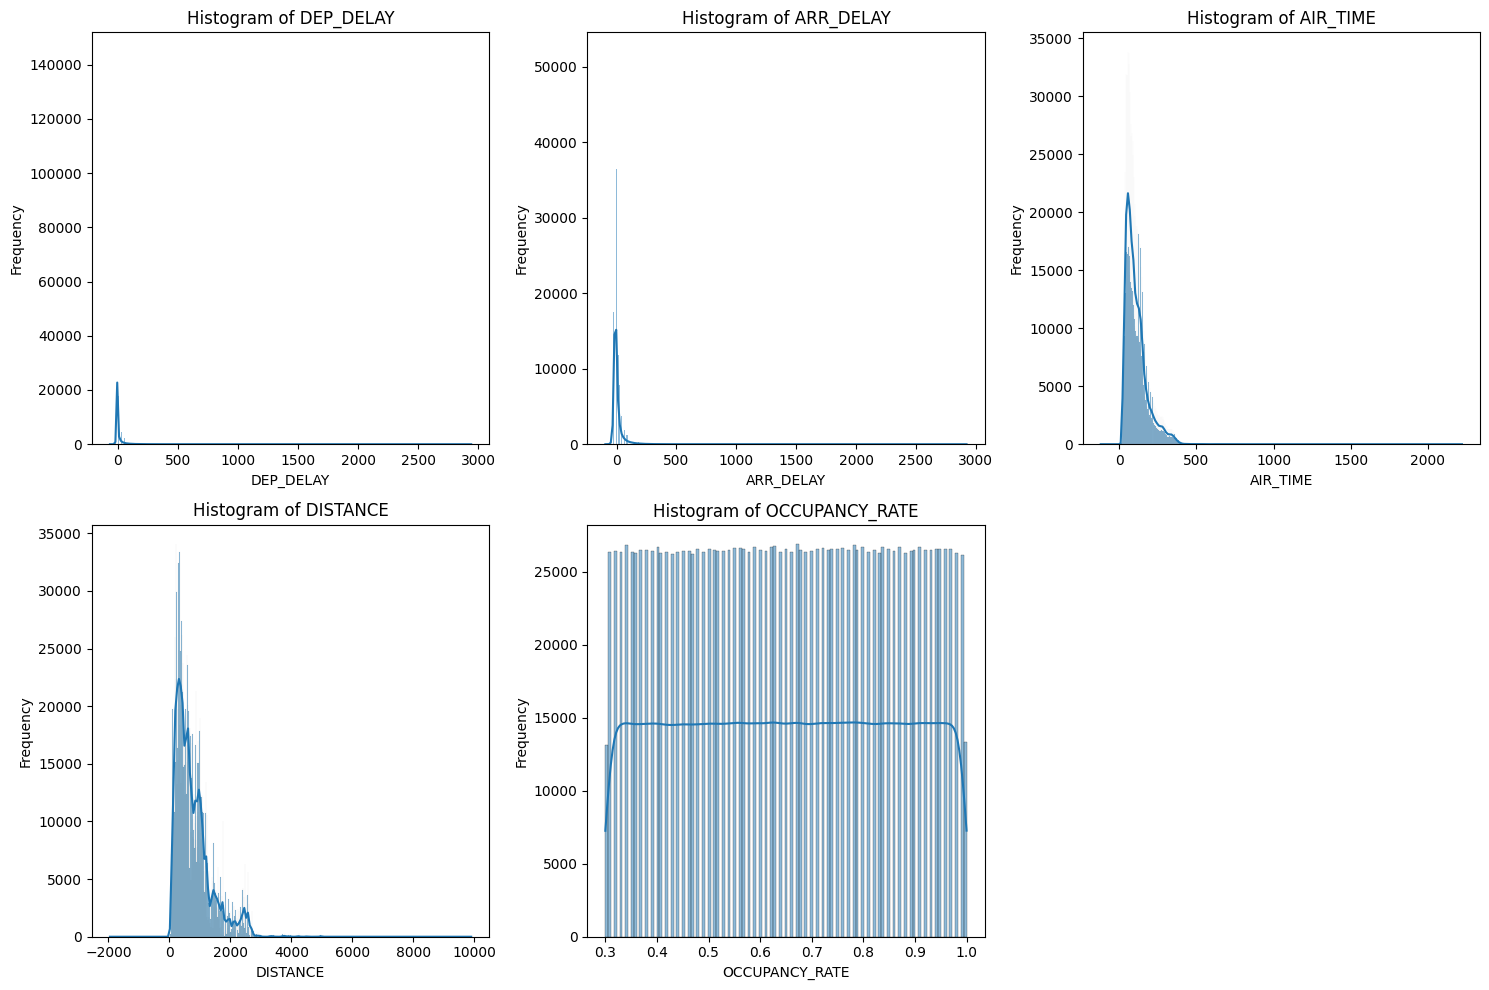

In [241]:
columns_to_plot = ["DEP_DELAY", "ARR_DELAY", "AIR_TIME", "DISTANCE", "OCCUPANCY_RATE"]

# Create histograms for each specified column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(flights[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [242]:
flights.shape
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.15)
    Q3 = df[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# List of columns to handle outliers
columns_to_handle = ["DEP_DELAY", "ARR_DELAY", "AIR_TIME", "DISTANCE", "OCCUPANCY_RATE"]

# Identify outliers for each specified column and drop rows containing outliers
for column in columns_to_handle:
    outliers = identify_outliers(flights, column)
    flights = flights.drop(outliers.index)

print("\nDataFrame after dropping outlier rows:")
print(flights)
flights.shape


DataFrame after dropping outlier rows:
        OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  \
0               WN   N955WN              4591              14635    RSW   
1               WN   N8686A              3231              14635    RSW   
2               WN   N201LV              3383              14635    RSW   
3               WN   N413WN              5498              14635    RSW   
4               WN   N7832A              6933              14635    RSW   
...            ...      ...               ...                ...    ...   
1910976         AA   N960AN              1414              12478    JFK   
1910977         AA   N870NN              1414              12478    JFK   
1910978         AA   N841NN              1414              12478    JFK   
1910979         AA   N886NN              1414              12478    JFK   
1910980         AA   N344PP              1414              12478    JFK   

        ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_

(1717702, 18)

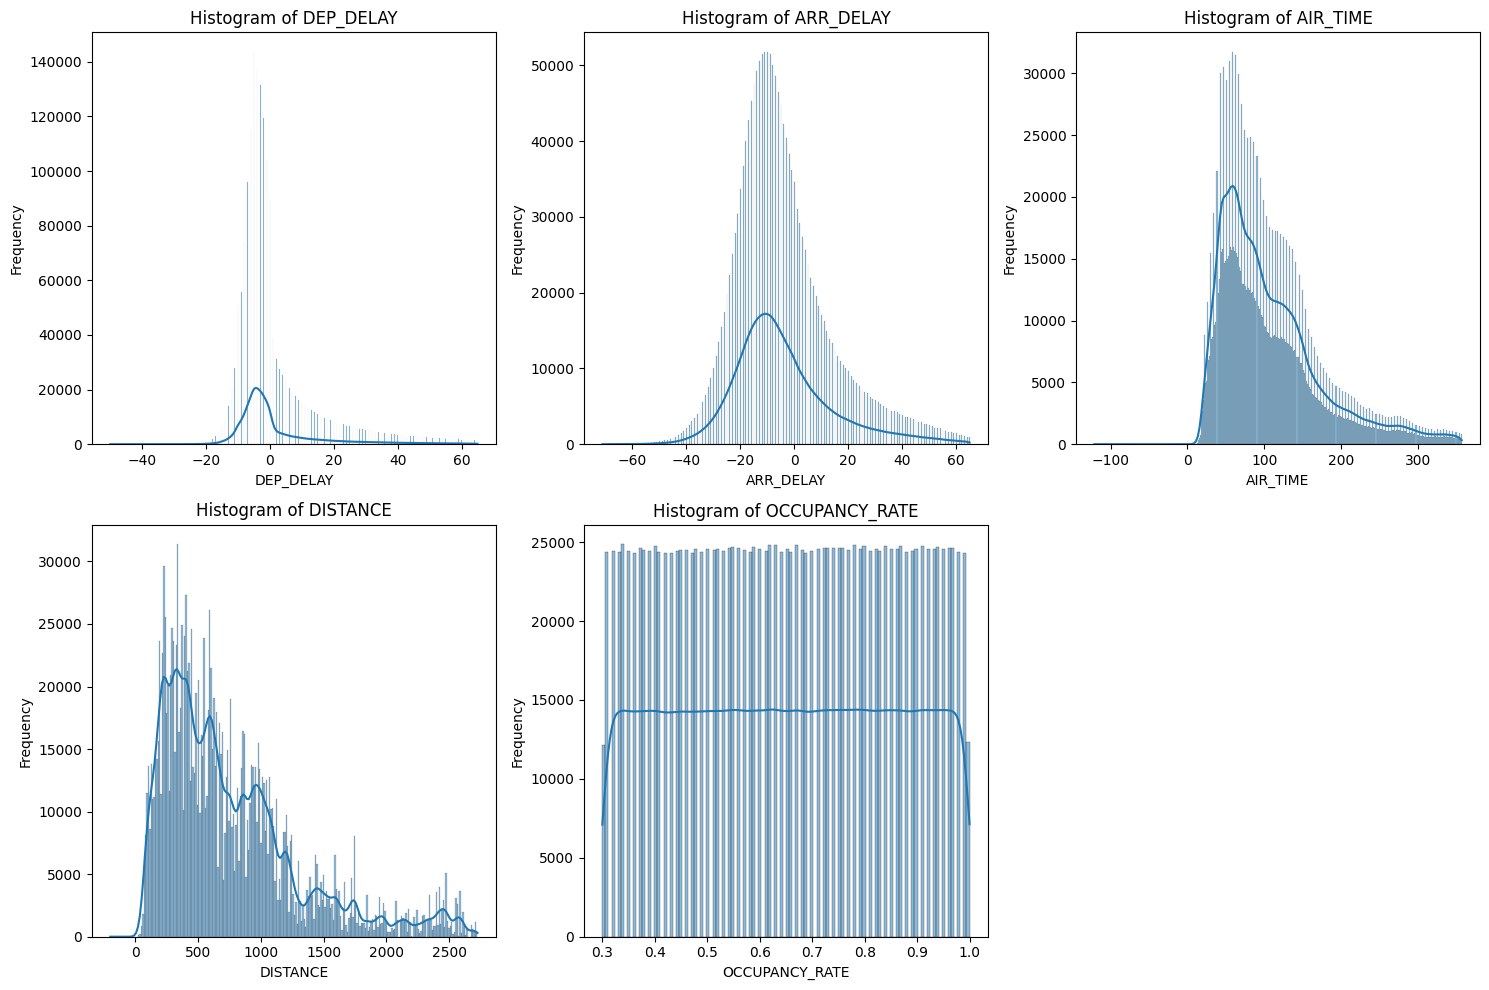

In [243]:
columns_to_plot = ["DEP_DELAY", "ARR_DELAY", "AIR_TIME", "DISTANCE", "OCCUPANCY_RATE"]

# Create histograms for each specified column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(flights[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [244]:
tickets = pd.read_csv('tickets.csv')
print(tickets.shape)
print(tickets.describe(include='object'))
print("\nMissing Values:")
#print(tickets.isnull().sum())
print(tickets.isna().sum()) 
tickets.drop(tickets[tickets['ROUNDTRIP'] == 0.0].index, inplace=True)
print(tickets.shape) 
tickets['TKT_MONTH']='01'
tickets['TKT_DAY']='01' 
tickets.head(4)

(1167285, 12)
         ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR ORIGIN_STATE_NM  \
count   1167285        1167285          1167285         1167285   
unique      419              1               52              52   
top         LAX             US               CA      California   
freq      33462        1167285           129910          129910   

       REPORTING_CARRIER ITIN_FARE DESTINATION  
count            1167285   1166325     1167285  
unique                21      3791         410  
top                   AA      11.0         LAX  
freq              185117     32926       38947  

Missing Values:
ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
ROUNDTRIP               0
REPORTING_CARRIER       0
PASSENGERS           1977
ITIN_FARE             960
DESTINATION             0
dtype: int64
(708600, 12)


,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION,TKT_MONTH,TKT_DAY
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB,01,01
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS,01,01
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO,01,01
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA,01,01


In [245]:
#tickets['MONTH'] = tickets['ITIN_ID'].astype(str).str[4:6]
#distinct_tickets = tickets['MONTH'].unique()
tickets.shape
tickets['ITIN_FARE'] = pd.to_numeric(tickets['ITIN_FARE'], errors='coerce') # Convert ITIN_FARE to numeric, setting non-numeric values to NaN
tickets.dropna(subset=['ITIN_FARE'], inplace=True) # we can impute based on "ITIN_FARE","ORIGIN", "DESTINATION"
tickets.shape
tickets['PASSENGERS'] = pd.to_numeric(tickets['PASSENGERS'], errors='coerce') # Convert ITIN_FARE to numeric, setting non-numeric values to NaN
tickets.dropna(subset=['PASSENGERS'], inplace=True) 
tickets['ITIN_FARE'] = tickets['ITIN_FARE'].astype('int64')
tickets['PASSENGERS'] = tickets['PASSENGERS'].astype('int64')
tickets.shape
tickets.drop_duplicates(inplace=True)
tickets.shape
#print(tickets.isnull().sum())
print(tickets.isna().sum())


ITIN_ID              0
YEAR                 0
QUARTER              0
ORIGIN               0
ORIGIN_COUNTRY       0
ORIGIN_STATE_ABR     0
ORIGIN_STATE_NM      0
ROUNDTRIP            0
REPORTING_CARRIER    0
PASSENGERS           0
ITIN_FARE            0
DESTINATION          0
TKT_MONTH            0
TKT_DAY              0
dtype: int64


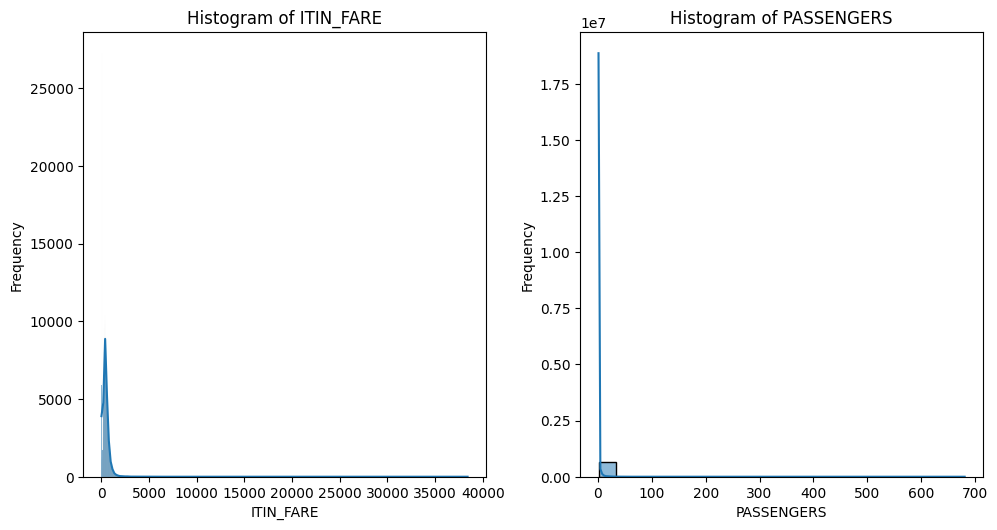

In [246]:
columns_to_plot = ["ITIN_FARE", "PASSENGERS"]

# Create histograms for each specified column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(tickets[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [247]:

tickets.reset_index(drop=True, inplace=True)
tickets.shape
print(tickets.head(1))
tickets['PASSENGERS'].unique()

def check_outliers(df, column):
    Q1 = df[column].quantile(0.10)
    Q3 = df[column].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# # List of columns to handle outliers
cols =  ["ITIN_FARE", "PASSENGERS"]

# Identify outliers for each specified column and drop rows containing outliers
for col in cols:
    outliers = check_outliers(tickets, col) 
    tickets = tickets.drop(outliers.index)

print("\nDataFrame after dropping outlier rows:")
print(tickets)
tickets.shape

        ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0  201912723049  2019        1    ABI             US               TX   

  ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE  \
0           Texas        1.0                MQ           1        736   

  DESTINATION TKT_MONTH TKT_DAY  
0         DAB        01      01  

DataFrame after dropping outlier rows:
             ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0       201912723049  2019        1    ABI             US               TX   
1       201912723085  2019        1    ABI             US               TX   
2       201912723491  2019        1    ABI             US               TX   
3       201912723428  2019        1    ABI             US               TX   
4       201912723337  2019        1    ABI             US               TX   
...              ...   ...      ...    ...            ...              ...   
658421  201915099493  2019        1    YUM          

(627207, 14)

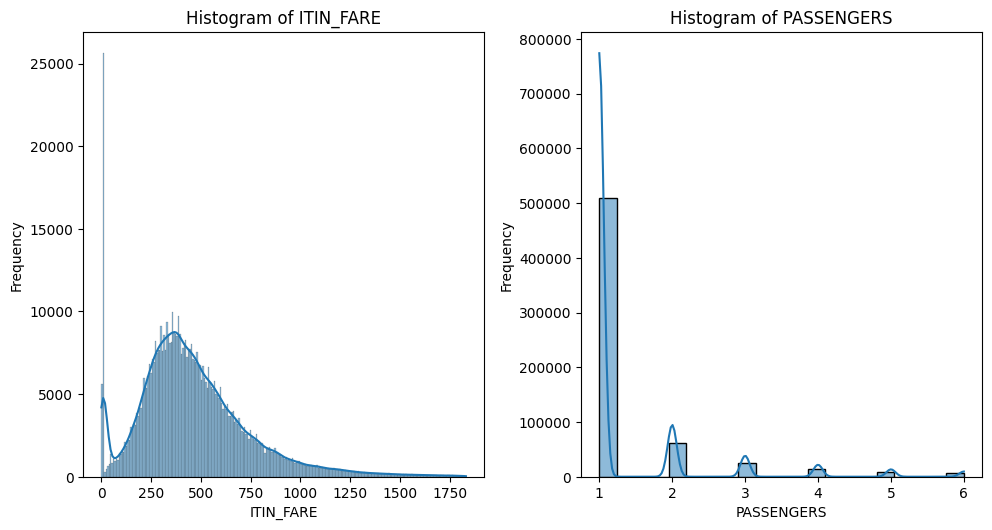

In [248]:
columns_to_plot = ["ITIN_FARE", "PASSENGERS"]

# Create histograms for each specified column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(tickets[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [250]:
airports = pd.read_csv('Airport_Codes.csv')
print(airports.shape)
print(airports.describe(include='object'))
print("\nMissing Values:")
print(airports.isnull().sum())
print(airports.isna().sum())
airports = airports[(airports['ISO_COUNTRY'] == 'US') & (airports['TYPE'].isin(['large_airport', 'medium_airport']))] #you can consider small_airport
print(airports.shape)
#print(airports.isnull().sum())
print(airports.isna().sum())
print(airports.shape)

(55369, 8)
                 TYPE                         NAME CONTINENT ISO_COUNTRY  \
count           55369                        55369     27526       55122   
unique              7                        52426         6         242   
top     small_airport  Centre Hospitalier Heliport        EU          US   
freq            34120                           85      7955       22810   

       MUNICIPALITY IATA_CODE            COORDINATES  
count         49663      9182                  55369  
unique        27221      9062                  55240  
top           Seoul         0  129.115255, 37.540345  
freq            403        80                     50  

Missing Values:
TYPE                0
NAME                0
ELEVATION_FT     7015
CONTINENT       27843
ISO_COUNTRY       247
MUNICIPALITY     5706
IATA_CODE       46187
COORDINATES         0
dtype: int64
TYPE                0
NAME                0
ELEVATION_FT     7015
CONTINENT       27843
ISO_COUNTRY       247
MUNICIPALITY     

In [251]:
print(airports.head(1))

def standardize_coordinates(coord_str):
    longitude, latitude = map(float, coord_str.replace(' ', '').split(','))
    return longitude, latitude

# Apply the function to the COORDINATES column and create new columns for longitude and latitude
airports['LONGITUDE'], airports['LATITUDE'] = zip(*airports['COORDINATES'].apply(standardize_coordinates))
airports.head(1)
airports.shape

                TYPE                     NAME  ELEVATION_FT CONTINENT  \
6194  medium_airport  Aleknagik / New Airport          66.0       NaN   

     ISO_COUNTRY MUNICIPALITY IATA_CODE                    COORDINATES  
6194          US    Aleknagik       WKK  -158.617996216, 59.2826004028  


(858, 10)

In [252]:
print(airports.shape)
airports.dropna(subset=['ELEVATION_FT'], inplace=True) 
print(airports.shape)
airports.drop_duplicates(inplace=True)
print(airports.shape)
print(airports.isnull().sum())
airports.drop(columns=['CONTINENT'], inplace=True)
print(airports.isna().sum())

(858, 10)
(855, 10)
(855, 10)
TYPE              0
NAME              0
ELEVATION_FT      0
CONTINENT       855
ISO_COUNTRY       0
MUNICIPALITY      0
IATA_CODE        34
COORDINATES       0
LONGITUDE         0
LATITUDE          0
dtype: int64
TYPE             0
NAME             0
ELEVATION_FT     0
ISO_COUNTRY      0
MUNICIPALITY     0
IATA_CODE       34
COORDINATES      0
LONGITUDE        0
LATITUDE         0
dtype: int64


In [253]:
distinct_airports = airports['IATA_CODE'].unique()
airports.dropna(subset=['IATA_CODE'], inplace=True) 
print(airports.isna().sum())
airports.shape

TYPE            0
NAME            0
ELEVATION_FT    0
ISO_COUNTRY     0
MUNICIPALITY    0
IATA_CODE       0
COORDINATES     0
LONGITUDE       0
LATITUDE        0
dtype: int64


(821, 9)

In [254]:
flights.head(2)

,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,FL_YEAR,FL_MONTH,FL_DAY
0,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97,2019,03,02
1,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55,2019,03,02


In [255]:
tickets.head(2)

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION,TKT_MONTH,TKT_DAY
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1,736,DAB,01,01
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1,570,COS,01,01


In [256]:
airports.head(2)

,TYPE,NAME,ELEVATION_FT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES,LONGITUDE,LATITUDE
6194,medium_airport,Aleknagik / New Airport,66.0,US,Aleknagik,WKK,"-158.617996216, 59.2826004028",-158.617996,59.2826
26143,medium_airport,Lehigh Valley International Airport,393.0,US,Allentown,ABE,"-75.44080352783203, 40.652099609375",-75.440804,40.6521


In [257]:
# Join flights with airport codes for origin airports
flights_airport_codes = flights.merge(
    airports,
    left_on='ORIGIN',
    right_on='IATA_CODE',
    how='inner'
)
print(flights_airport_codes.shape)
flights_airport_codes.head(2)

origin_rename = {
        'TYPE': 'ORIGIN_AIRPORT_TYPE',
        'NAME': 'ORIGIN_AIRPORT_NAME',
        'MUNICIPALITY': 'ORIGIN_MUNICIPALITY',
        'LATITUDE': 'LATITUDE_ORIGIN',
        'LONGITUDE': 'LONGITUDE_ORIGIN'
    }
flights_airport_codes = flights_airport_codes.rename(columns=origin_rename)

# Join with airport codes for destination airports
flights_airport_codes = flights_airport_codes.merge(
        airports,
        left_on='DESTINATION',
        right_on='IATA_CODE',
        how='inner',
        suffixes=('', '_destination')
)

dest_rename = {
        'TYPE': 'DESTINATION_AIRPORT_TYPE',
        'NAME': 'DESTINATION_AIRPORT_NAME',
        'MUNICIPALITY': 'DESTINATION_MUNICIPALITY',
        'LATITUDE': 'LATITUDE_DESTINATION',
        'LONGITUDE': 'LONGITUDE_DESTINATION'
    }
flights_airport_codes = flights_airport_codes.rename(columns=dest_rename)

columns_to_keep = [
        'FL_YEAR','FL_MONTH', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
        'ORIGIN', 'ORIGIN_CITY_NAME', 'DESTINATION', 'DEST_CITY_NAME',
        'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE',
        'ORIGIN_AIRPORT_TYPE', 'ORIGIN_AIRPORT_NAME', 'ORIGIN_MUNICIPALITY',
        'DESTINATION_AIRPORT_TYPE', 'DESTINATION_AIRPORT_NAME', 'DESTINATION_MUNICIPALITY',
        'LATITUDE_ORIGIN', 'LONGITUDE_ORIGIN', 'LATITUDE_DESTINATION', 'LONGITUDE_DESTINATION'
    ]
flights_airport_codes = flights_airport_codes[columns_to_keep]

(1702800, 27)


In [258]:
#Create roundtrip routes by sorting origin-destination pairs
tickets['ROUNDTRIP_ROUTE'] = tickets.apply(
        lambda x: '-'.join(sorted([x['ORIGIN'], x['DESTINATION']])),
        axis=1
    )

tickets.shape

(627207, 15)

In [259]:
# tickets_groupby = tickets.groupby(
#         ['ORIGIN', 'DESTINATION', 'REPORTING_CARRIER', 'ROUNDTRIP_ROUTE'],
#         as_index=False
#     )
# print(tickets_groupby.head(1))
# tickets_aggregated = tickets_groupby['ITIN_FARE'].mean().rename(columns={'ITIN_FARE': 'AVG_ITIN_FARE'})
# print(tickets_aggregated.shape)
# print(tickets_aggregated.head(1))

tickets_aggregated = tickets.groupby(
        ['ORIGIN', 'DESTINATION', 'REPORTING_CARRIER', 'ROUNDTRIP_ROUTE'],
        as_index=False
    )['ITIN_FARE'].mean().rename(columns={'ITIN_FARE': 'AVG_ITIN_FARE'})
print(tickets_aggregated.shape)
print(tickets_aggregated.head(1))
result_data = flights_airport_codes.merge(
        tickets_aggregated,
        left_on=['ORIGIN', 'DESTINATION', 'OP_CARRIER'],
        right_on=['ORIGIN', 'DESTINATION', 'REPORTING_CARRIER'],
        how='inner'
    )
print(result_data.shape)
result_data.drop_duplicates(inplace=True)
print(result_data.shape)


(87468, 5)
  ORIGIN DESTINATION REPORTING_CARRIER ROUNDTRIP_ROUTE  AVG_ITIN_FARE
0    ABE         ABQ                DL         ABE-ABQ          437.0
(1595698, 27)
(1595698, 27)


In [260]:
result_data.head(1) #main data

,FL_YEAR,FL_MONTH,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,DEP_DELAY,...,DESTINATION_AIRPORT_TYPE,DESTINATION_AIRPORT_NAME,DESTINATION_MUNICIPALITY,LATITUDE_ORIGIN,LONGITUDE_ORIGIN,LATITUDE_DESTINATION,LONGITUDE_DESTINATION,REPORTING_CARRIER,ROUNDTRIP_ROUTE,AVG_ITIN_FARE
0,2019,03,WN,N955WN,4591,RSW,"Fort Myers, FL",CLE,"Cleveland, OH",-8.0,...,large_airport,Cleveland Hopkins International Airport,Cleveland,26.5362,-81.755203,41.411701,-81.8498,WN,CLE-RSW,135.0


In [261]:
#find_busiest_routes
top_busy_route=5
route_counts = result_data.value_counts('ROUNDTRIP_ROUTE').reset_index() # Count route frequencies
route_counts = route_counts.rename(columns={'count': 'TOTAL_FLIGHTS'}) # Rename count column
route_counts['TOTAL_FLIGHTS'] = route_counts['TOTAL_FLIGHTS'] / 2 # Adjust for roundtrips
route_counts = route_counts.nlargest(top_busy_route, 'TOTAL_FLIGHTS') ## Sort and select top n
route_counts['TOTAL_ROUNDTRIP_FLIGHTS'] = route_counts['TOTAL_FLIGHTS'].astype(int) # Convert to integer and select final columns
busiest_routes = route_counts[['ROUNDTRIP_ROUTE', 'TOTAL_ROUNDTRIP_FLIGHTS']]
busiest_routes.shape
busiest_routes.head(top_busy_route)


,ROUNDTRIP_ROUTE,TOTAL_ROUNDTRIP_FLIGHTS
0,LAX-SFO,3622
1,LGA-ORD,3060
2,LAS-LAX,3034
3,JFK-LAX,2527
4,HNL-OGG,2383


In [262]:
#Calculate financial data

# Calculate and summarize financial data, then visualize the most profitable routes
finz = result_data.copy()
    
# Calculate passenger and distance metrics for roundtrips
finz['PASSENGERS_ROUNDTRIP'] = finz['OCCUPANCY_RATE'] * 200 * 2  # Assuming 200 seats
finz['DISTANCE_ROUNDTRIP'] = finz['DISTANCE'] * 2

# Calculate delay costs
finz['DELAY_COST_DEP'] = finz['DEP_DELAY'].apply(lambda x: max(0, x - 15) * 75)
finz['DELAY_COST_ARR'] = finz['ARR_DELAY'].apply(lambda x: max(0, x - 15) * 75)
finz['DELAY_COST'] = finz['DELAY_COST_DEP'] + finz['DELAY_COST_ARR']

# Calculate fixed costs based on airport types
finz['FIXED_COST'] = (
    np.where(finz['ORIGIN_AIRPORT_TYPE'] == 'medium_airport', 5000, 10000) +
    np.where(finz['DESTINATION_AIRPORT_TYPE'] == 'medium_airport', 5000, 10000)
)

# Calculate variable costs
finz['VARIABLE_COST_1'] = finz['DISTANCE_ROUNDTRIP'] * 8  # Fuel, oil, maintenance
finz['VARIABLE_COST_2'] = finz['DISTANCE_ROUNDTRIP'] * 1.18  # Depreciation, insurance
finz['VARIABLE_COST'] = finz['VARIABLE_COST_1'] + finz['VARIABLE_COST_2']

# Calculate total costs
finz['TOTAL_COST'] = finz['DELAY_COST'] + finz['FIXED_COST'] + finz['VARIABLE_COST']

# Calculate revenues
finz['TICKETS_REVENUE'] = (finz['AVG_ITIN_FARE'] / 2) * finz['PASSENGERS_ROUNDTRIP']
finz['BAGGAGE_FEE'] = finz['PASSENGERS_ROUNDTRIP'] * 0.5 * 70  # Assuming 50% checked bags at $70
finz['TOTAL_REVENUE'] = finz['TICKETS_REVENUE'] + finz['BAGGAGE_FEE']

# Calculate profit
finz['PROFIT'] = finz['TOTAL_REVENUE'] - finz['TOTAL_COST']
finz.shape
finz.head(100) # financial_data will be used throught the project

,FL_YEAR,FL_MONTH,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,DEP_DELAY,...,DELAY_COST,FIXED_COST,VARIABLE_COST_1,VARIABLE_COST_2,VARIABLE_COST,TOTAL_COST,TICKETS_REVENUE,BAGGAGE_FEE,TOTAL_REVENUE,PROFIT
0,2019,03,WN,N955WN,4591,RSW,"Fort Myers, FL",CLE,"Cleveland, OH",-8.0,...,0.0,20000,16400.0,2419.0,18819.0,38819.0,26190.000000,13580.0,39770.000000,951.000000
1,2019,03,WN,N8686A,3231,RSW,"Fort Myers, FL",CMH,"Columbus, OH",1.0,...,0.0,20000,14880.0,2194.8,17074.8,37074.8,29107.419355,7700.0,36807.419355,-267.380645
2,2019,03,WN,N201LV,3383,RSW,"Fort Myers, FL",CMH,"Columbus, OH",0.0,...,0.0,20000,14880.0,2194.8,17074.8,37074.8,48159.548387,12740.0,60899.548387,23824.748387
3,2019,03,WN,N413WN,5498,RSW,"Fort Myers, FL",CMH,"Columbus, OH",11.0,...,0.0,20000,14880.0,2194.8,17074.8,37074.8,35458.129032,9380.0,44838.129032,7763.329032
4,2019,03,WN,N7832A,6933,RSW,"Fort Myers, FL",DAL,"Dallas, TX",0.0,...,0.0,20000,16080.0,2371.8,18451.8,38451.8,46670.500000,8680.0,55350.500000,16898.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019,03,WN,N745SW,4494,SAN,"San Diego, CA",SMF,"Sacramento, CA",9.0,...,75.0,20000,7680.0,1132.8,8812.8,28887.8,24667.605634,7000.0,31667.605634,2779.805634
96,2019,03,WN,N271LV,4509,SAN,"San Diego, CA",SMF,"Sacramento, CA",10.0,...,0.0,20000,7680.0,1132.8,8812.8,28812.8,48841.859155,13860.0,62701.859155,33889.059155
97,2019,03,WN,N746SW,4512,SAN,"San Diego, CA",SMF,"Sacramento, CA",-7.0,...,0.0,20000,7680.0,1132.8,8812.8,28812.8,31081.183099,8820.0,39901.183099,11088.383099
98,2019,03,WN,N7831B,4858,SAN,"San Diego, CA",SMF,"Sacramento, CA",33.0,...,2475.0,20000,7680.0,1132.8,8812.8,31287.8,46375.098592,13160.0,59535.098592,28247.298592


In [230]:
# summarize top 10 routes by profit 
top_profitable_routes=5
profitable_routesy = (finz.groupby('ROUNDTRIP_ROUTE')
              .agg({
                  'ROUNDTRIP_ROUTE': lambda x: len(x)/2,
                  'TOTAL_REVENUE': 'sum',
                  'TOTAL_COST': 'sum',
                  'PROFIT': 'sum'
              })
              .rename(columns={
                  'ROUNDTRIP_ROUTE': 'TOTAL_ROUNDTRIP_FLIGHTS',
                  'PROFIT': 'TOTAL_PROFIT'
              })
              .reset_index()
              .sort_values('TOTAL_PROFIT', ascending=False)
              .head(top_profitable_routes))
profitable_routesy

,ROUNDTRIP_ROUTE,TOTAL_ROUNDTRIP_FLIGHTS,TOTAL_REVENUE,TOTAL_COST,TOTAL_PROFIT
1086,DCA-ORD,1683.0,2.633144e+08,1.062009e+08,1.571135e+08
2058,LAX-SFO,3622.5,3.434153e+08,1.935377e+08,1.498775e+08
176,ATL-LGA,2129.5,2.946705e+08,1.464361e+08,1.482344e+08
1690,HNL-OGG,2383.5,2.281810e+08,8.084859e+07,1.473324e+08
1070,DCA-LGA,1483.0,2.156166e+08,7.232661e+07,1.432900e+08


In [263]:
#summary route for recommendation
df = finz.copy()
    
# Create on-time indicators (equivalent to mutate)
df['ON_TIME_DEP'] = (df['DEP_DELAY'] <= 15).astype(int)
df['ON_TIME_ARR'] = (df['ARR_DELAY'] <= 15).astype(int)

# Calculate revenue to cost ratio before grouping
df['REVENUE_TO_COST_RATIO'] = df['TOTAL_REVENUE'] / df['TOTAL_COST']

# Group by roundtrip route and calculate metrics
route_summary = df.groupby('ROUNDTRIP_ROUTE').agg({
    'ROUNDTRIP_ROUTE': lambda x: len(x)/2,  # Total roundtrip flights
    'PROFIT': 'sum',
    'DELAY_COST': 'mean',
    'REVENUE_TO_COST_RATIO': 'mean',
    'ON_TIME_DEP': lambda x: (x.sum() / len(x)) * 100,
    'ON_TIME_ARR': lambda x: (x.sum() / len(x)) * 100,
    'OCCUPANCY_RATE': 'mean'
}).rename(columns={
    'ROUNDTRIP_ROUTE': 'TOTAL_ROUNDTRIP_FLIGHTS',
    'PROFIT': 'TOTAL_PROFIT',
    'DELAY_COST': 'AVG_DELAY_COST',
    'REVENUE_TO_COST_RATIO': 'AVG_REVENUE_TO_COST_RATIO',
    'ON_TIME_DEP': 'ON_TIME_DEP_PCT',
    'ON_TIME_ARR': 'ON_TIME_ARR_PCT',
    'OCCUPANCY_RATE': 'AVG_OCCUPANCY_RATE'
}).reset_index()

# Calculate combined on-time percentage
route_summary['COMBINED_ON_TIME_PCT'] = (
    route_summary['ON_TIME_DEP_PCT'] + route_summary['ON_TIME_ARR_PCT']
) / 2




In [264]:
#recommend_routes based on route summary
top_recommend_route=5
#  The 5 round trip routes that you recommend to invest in
# Define columns to keep
columns_to_select = [
    'ROUNDTRIP_ROUTE',
    'TOTAL_PROFIT',
    'COMBINED_ON_TIME_PCT',
    'AVG_REVENUE_TO_COST_RATIO',
    'AVG_DELAY_COST',
    'AVG_OCCUPANCY_RATE',
    'TOTAL_ROUNDTRIP_FLIGHTS'
]

# Sort by multiple criteria and select top N routes
recommended = (route_summary
                .sort_values(
                    by=['TOTAL_PROFIT',
                        'COMBINED_ON_TIME_PCT',
                        'AVG_REVENUE_TO_COST_RATIO',
                        'AVG_DELAY_COST',
                        'AVG_OCCUPANCY_RATE'],
                    ascending=[False,  # TOTAL_PROFIT (highest)
                            False,  # COMBINED_ON_TIME_PCT (highest)
                            False,  # AVG_REVENUE_TO_COST_RATIO (highest)
                            True,   # AVG_DELAY_COST (lowest)
                            False]  # AVG_OCCUPANCY_RATE (highest)
                )
                [columns_to_select]  # Select specific columns
                .head(top_recommend_route))        # Get top N routes



/var/folders/hl/w24rw40s2ysg4f5hvvkbv3w80000gn/T/ipykernel_91303/103003681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOTAL_PROFIT', y='ROUNDTRIP_ROUTE', data=recommended, palette='light:#5A9')


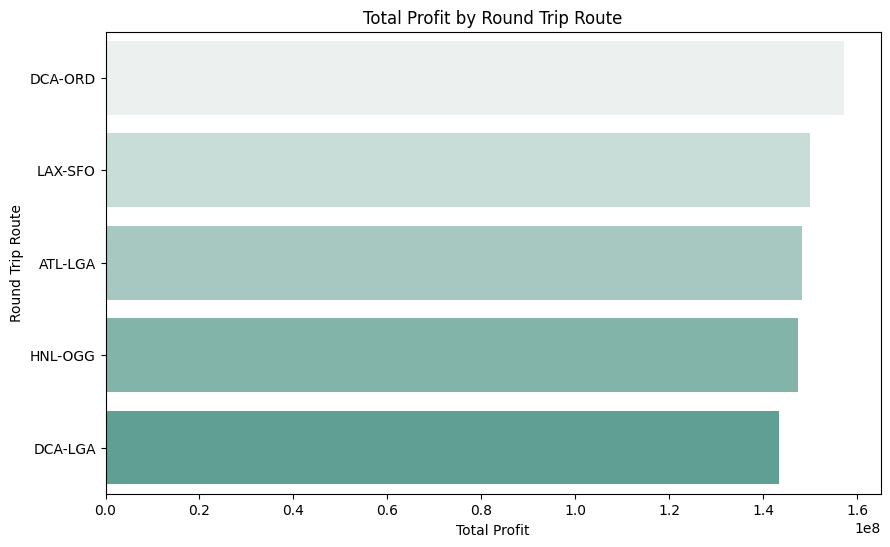

In [265]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TOTAL_PROFIT', y='ROUNDTRIP_ROUTE', data=recommended, palette='light:#5A9')
plt.title('Total Profit by Round Trip Route')
plt.xlabel('Total Profit')
plt.ylabel('Round Trip Route')
plt.show()